## Project On Netflix Data-Set

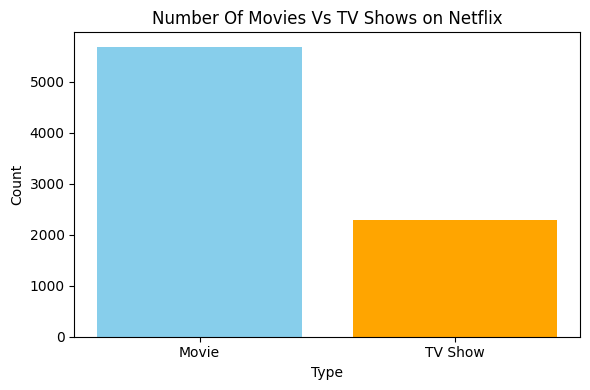

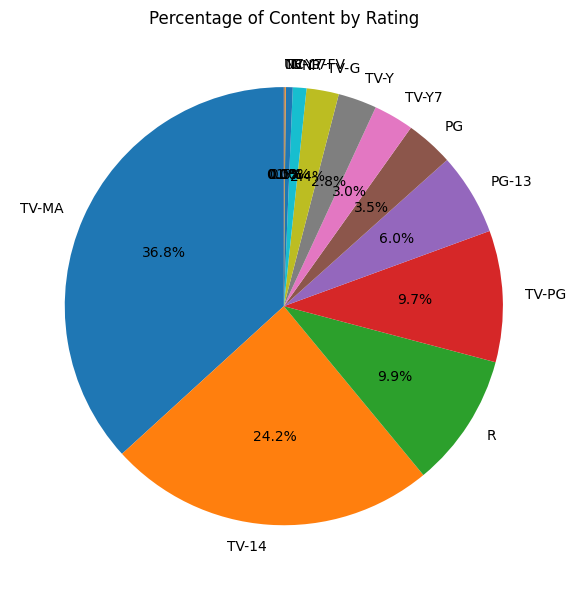

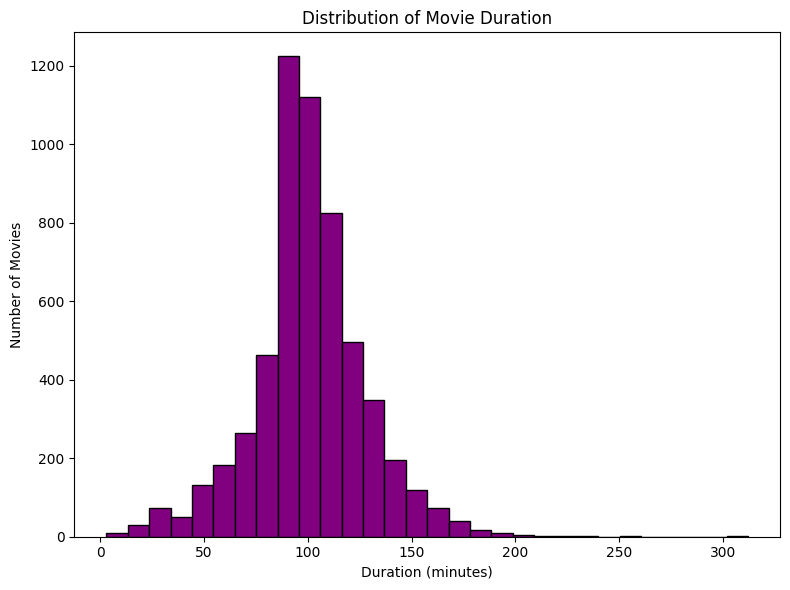

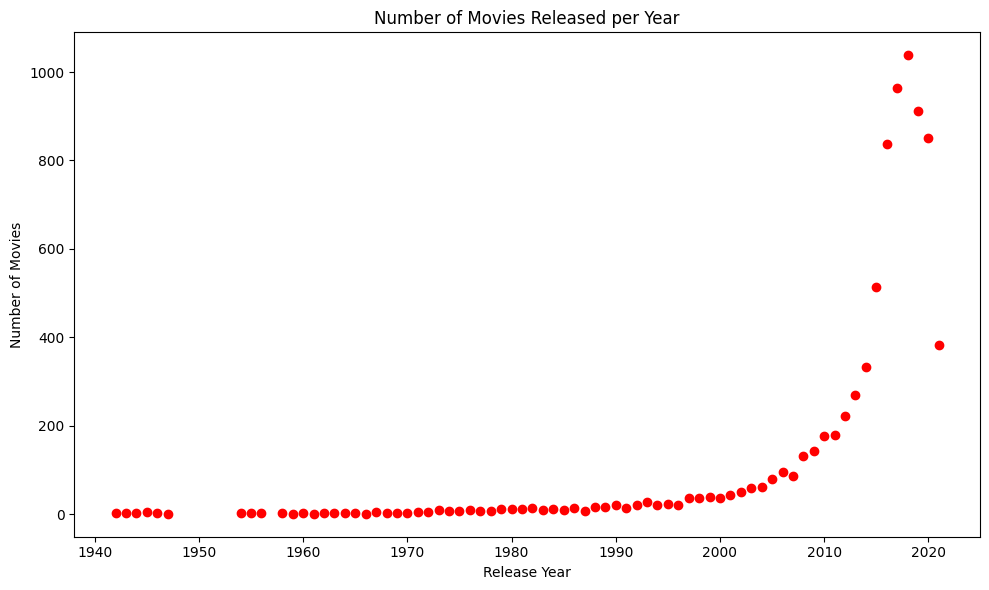

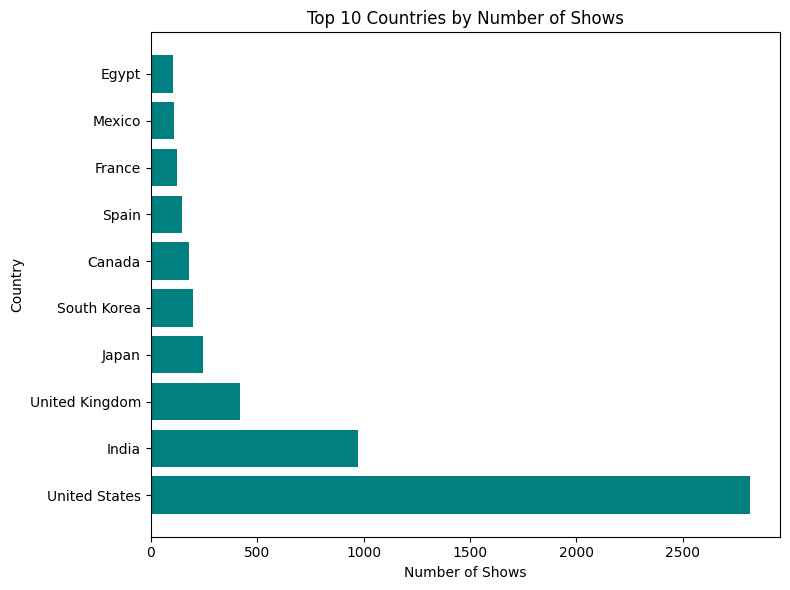

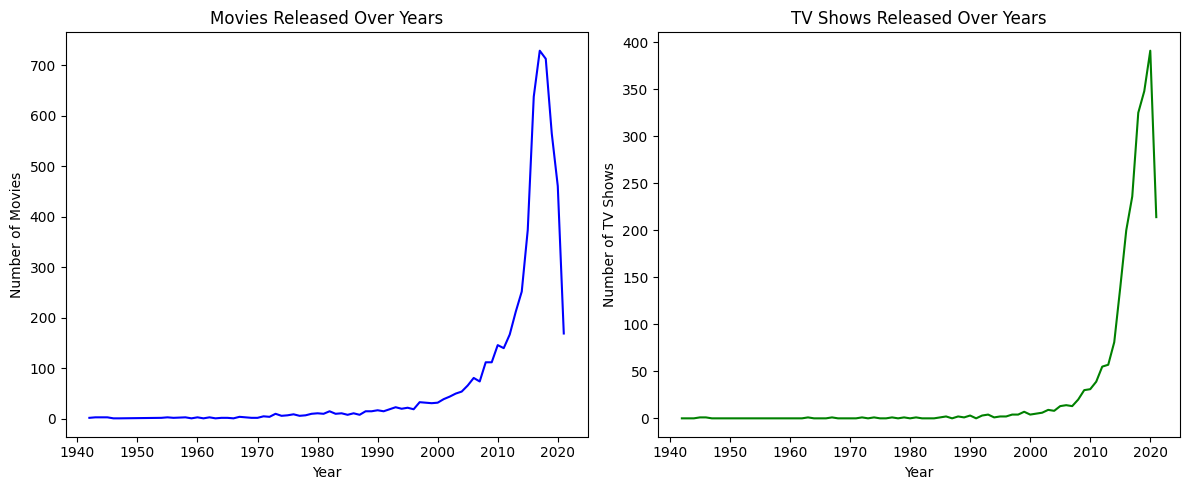

In [14]:
# Step-1 import the libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the Data
df = pd.read_csv(r"D:\3rd year\Python\Python code\Matplotlib\netflix_titles.csv")

# Clean data
df = df.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration'])

# Bar Plot: Movie vs TV Show
type_counts = df['type'].value_counts()

plt.figure(figsize=(6, 4))  # FIXED: should be plt.figure (not plt.Figure)
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.title('Number Of Movies Vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Movie_vs_Tvshows.png')
plt.show()

# Pie Chart: Rating Distribution
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(8, 6))  # FIXED
plt.pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Content by Rating')
plt.tight_layout()
plt.savefig('Movie_vs_Tvshows_rating.png')
plt.show()

# Filter only 'Movie' type entries
movie_df = df[df['type'] == 'Movie'].copy()

# Convert 'duration' column to integer (remove ' min' and convert)
movie_df['duration_int'] = movie_df['duration'].str.replace(' min', '').astype(int)

# ---------------- Histogram: Distribution of Movie Durations ----------------
plt.figure(figsize=(8, 6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()

# ---------------- Scatter Plot: Movies Released per Year ----------------
release_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Number of Movies Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movies_per_year_scatter.png')
plt.show()

# Top 10 Countries by Number of Shows
country_counts = df['country'].value_counts().head(10)

plt.figure(figsize=(8, 6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()

# Content Trend by Year (Movies vs TV Shows)
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released Over Years')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# Second subplot: TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='green')
ax[1].set_title('TV Shows Released Over Years')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

plt.tight_layout()
plt.savefig('movies_vs_tvshows_by_year.png')
plt.show()
